In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

**Additional Variable Information**

    1.  fLength:  continuous  # major axis of ellipse [mm]

    2.  fWidth:   continuous  # minor axis of ellipse [mm]

    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]

    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]

    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]

    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]

    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]

    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]

    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]

   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]

   11.  class:    g,h         # gamma (signal), hadron (background)


   g = gamma (signal):     12332
   
   h = hadron (background): 6688

In [ ]:
cols=[' fLength','fWidth',' fSize',' fConc',' fConc1','fAsym',' fM3Long',' fM3Trans',' fAlpha','fDist','class']
df=pd.read_csv("magic04.data",names=cols)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df['class'] =(df['class']=="g").astype(int)

In [ ]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


In [ ]:
print(df.columns)

Index([' fLength', 'fWidth', ' fSize', ' fConc', ' fConc1', 'fAsym',
       ' fM3Long', ' fM3Trans', ' fAlpha', 'fDist', 'class'],
      dtype='object')


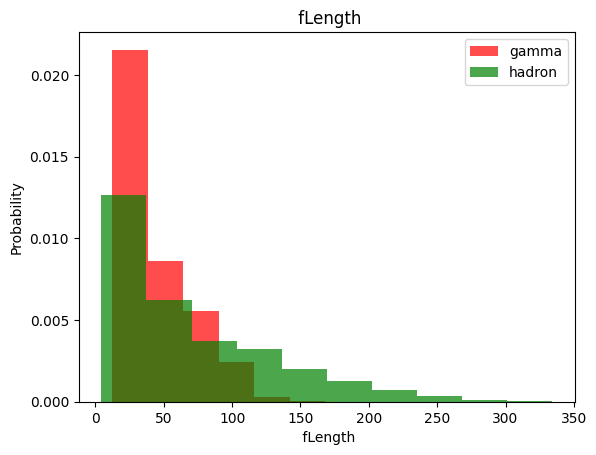

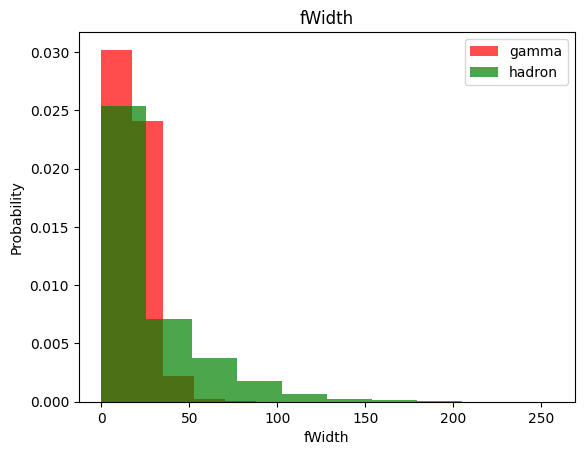

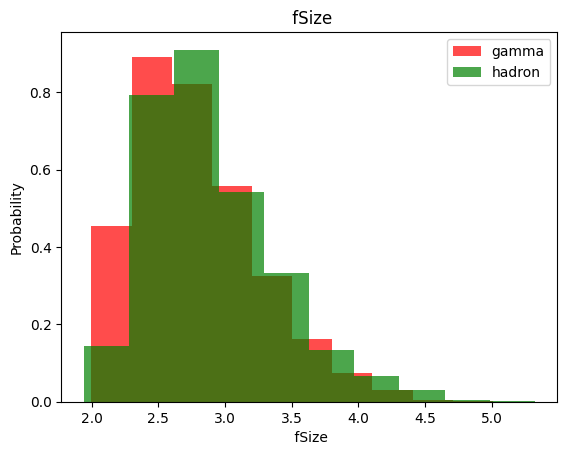

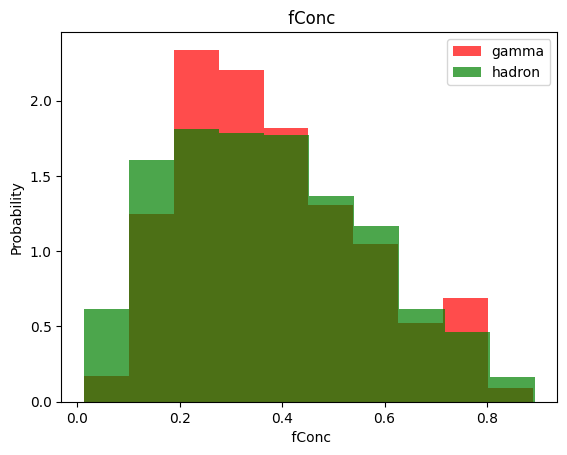

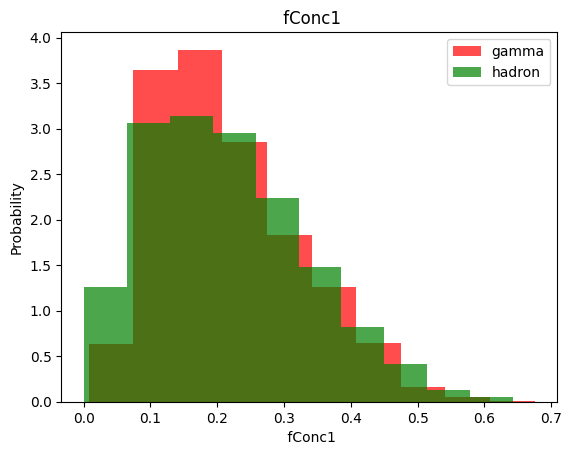

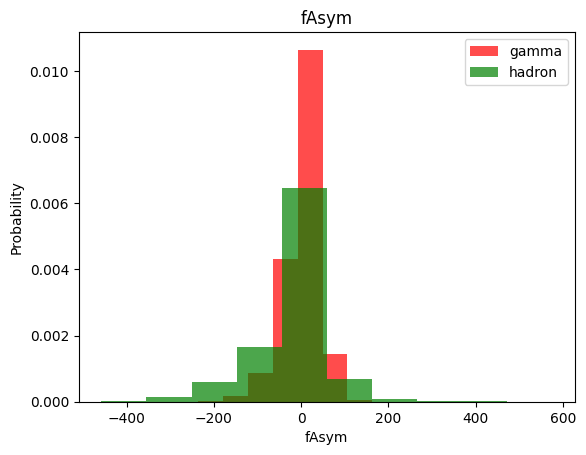

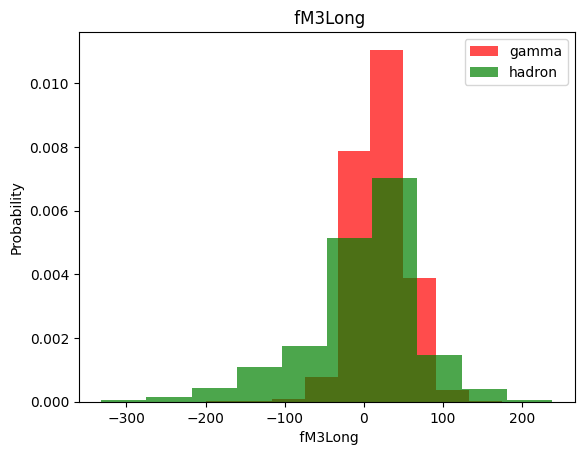

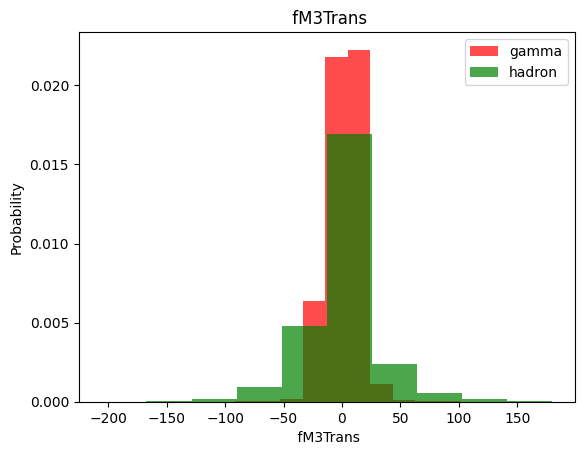

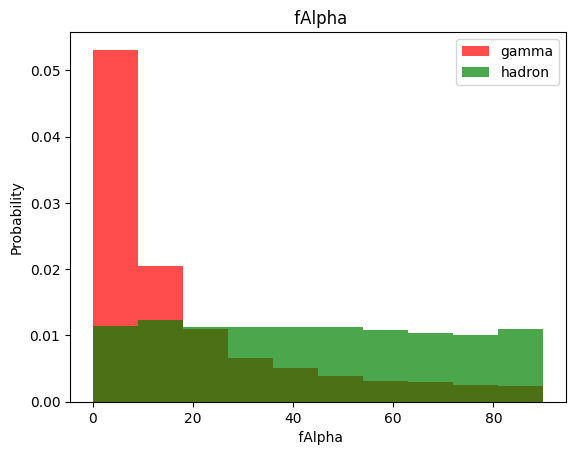

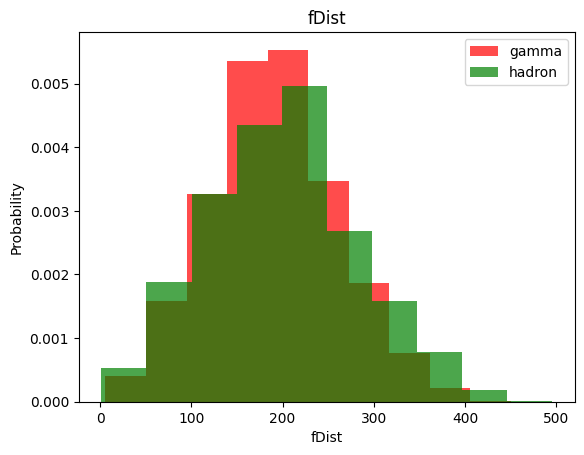

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='red',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label],color='green',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.xlabel(label)  # Set the x-axis label to the column name
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

**Train ,Validation,test dataset**

In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
#scaling the dataset
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

   # creating 2d array
  data = np.hstack((X , np.reshape(y,(-1,1))))

  return data , X ,y

In [ ]:
train , X_train, y_train =scale_dataset(train,oversample=True)
valid , X_valid, y_valid =scale_dataset(valid,oversample=False)
test , X_test, y_test =scale_dataset(test,oversample=False)

In [ ]:
len(y_train)

14792

In [ ]:
sum(y_train==1)

7396

In [ ]:
sum(y_train==0)

7396

**KNN MOdel**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model=knn_model.fit(X_train,y_train)

In [ ]:
knn_model

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict=knn_model.predict(X_test)

In [ ]:
y_predict

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1205
           1       0.88      0.84      0.86      2599

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.82      0.82      0.82      3804



**Navie Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      1322
           1       0.73      0.89      0.80      2482

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



**Logistic Regression **

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lg_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1322
           1       0.85      0.82      0.83      2482

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



**SVM (Support Vector Machine) **

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1322
           1       0.90      0.90      0.90      2482

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



**neural network**

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(.001),loss="binary_crossentropy",
                 metrics=['accuracy'])


In [ ]:
history = nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0)

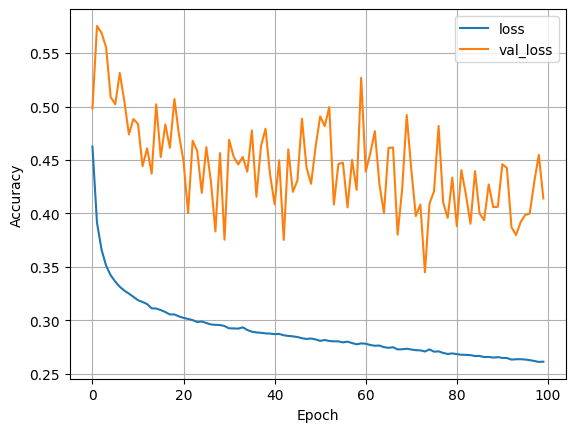

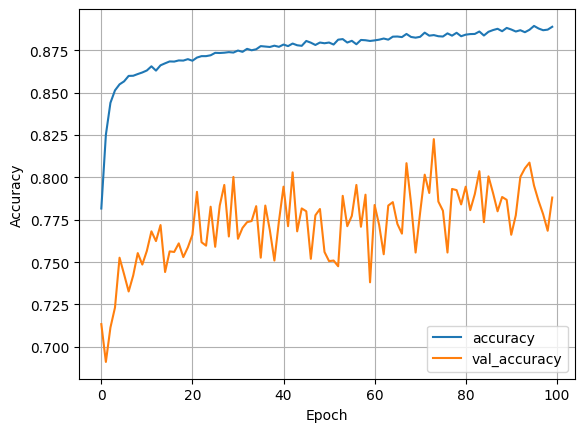

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)


  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)


  plt.show()


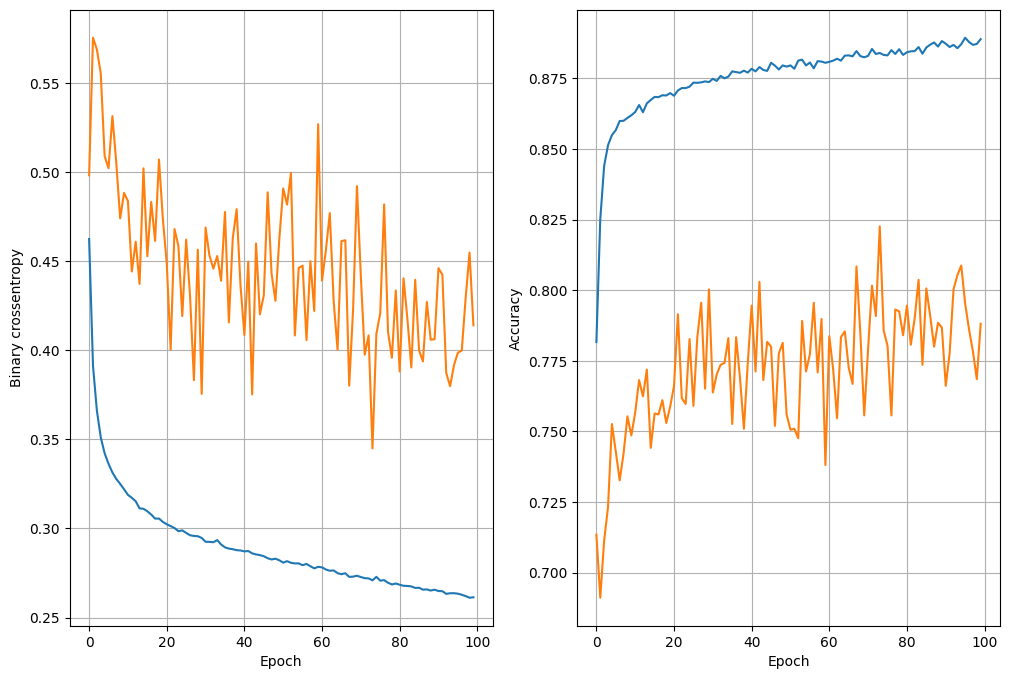

In [ ]:
plot_history(history)

In [ ]:
def train_model(X_train , y_train, num_nodes , dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="binary_crossentropy",
                 metrics=['accuracy'])

  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

  return nn_model , history



16 nodes,dropout 0,lr0.01,batch size 32


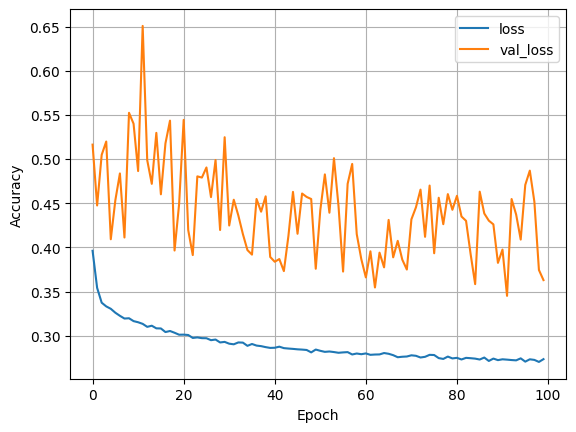

119/119 [==============================] - 0s 943us/step - loss: 0.3386 - accuracy: 0.8675
16 nodes,dropout 0,lr0.01,batch size 64


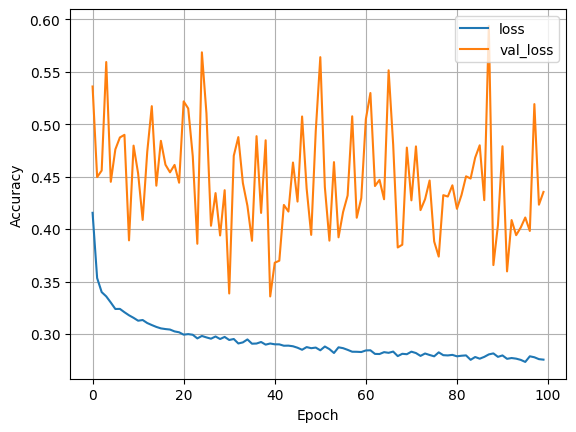

119/119 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8759
16 nodes,dropout 0,lr0.01,batch size 128


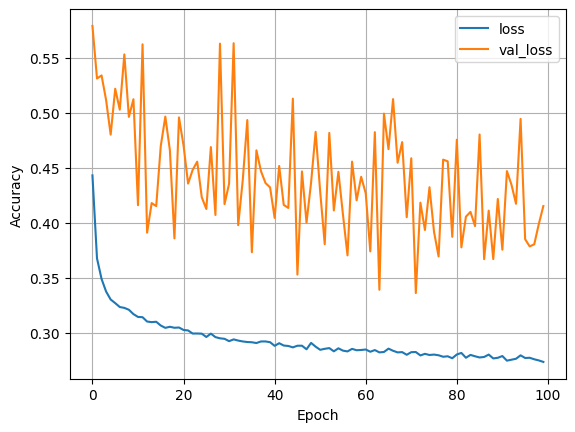

119/119 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8712
16 nodes,dropout 0,lr0.005,batch size 32


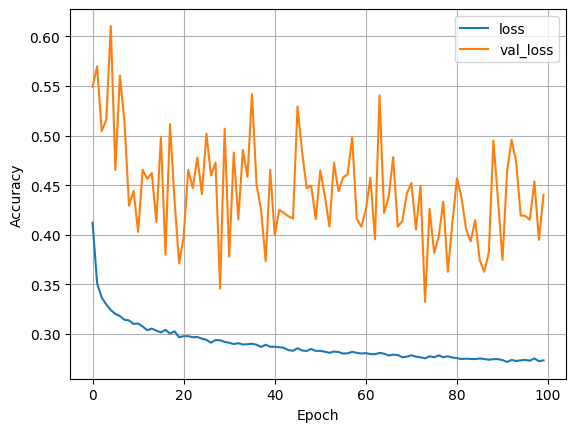

119/119 [==============================] - 0s 967us/step - loss: 0.3263 - accuracy: 0.8683
16 nodes,dropout 0,lr0.005,batch size 64


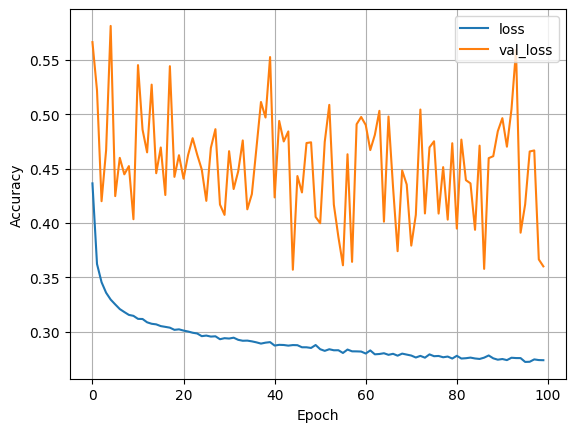

119/119 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8693
16 nodes,dropout 0,lr0.005,batch size 128


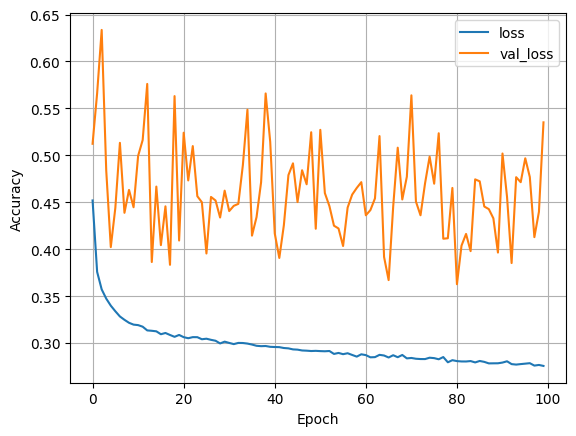

119/119 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8693
16 nodes,dropout 0,lr0.001,batch size 32


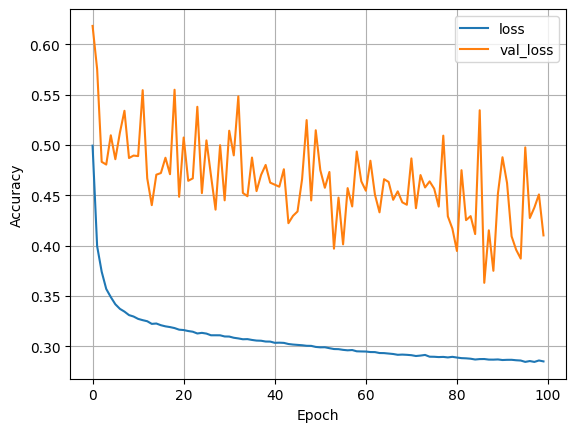

119/119 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8738
16 nodes,dropout 0,lr0.001,batch size 64


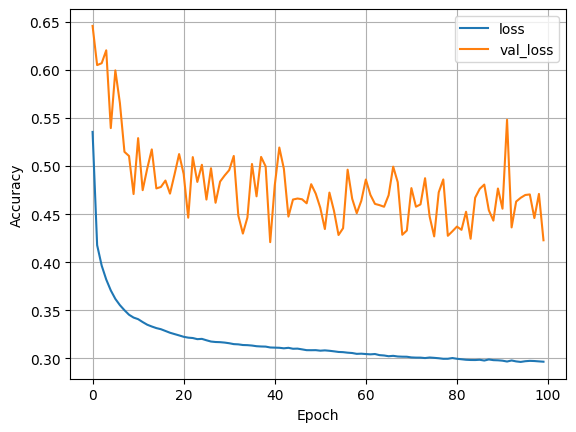

119/119 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8612
16 nodes,dropout 0,lr0.001,batch size 128


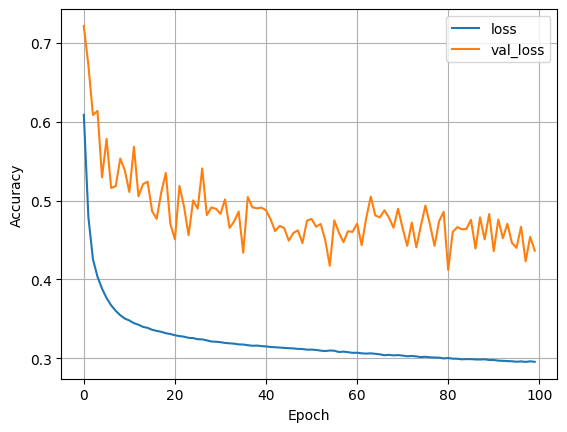

119/119 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8665
16 nodes,dropout 0.2,lr0.01,batch size 32


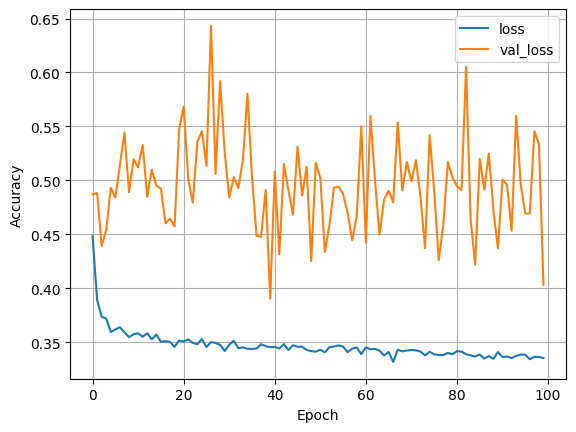

119/119 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8696
16 nodes,dropout 0.2,lr0.01,batch size 64


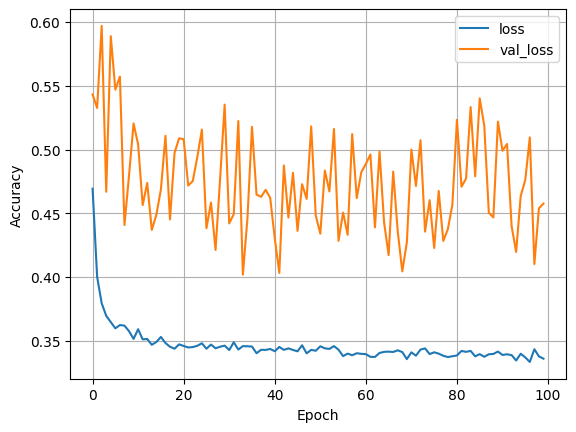

119/119 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8657
16 nodes,dropout 0.2,lr0.01,batch size 128


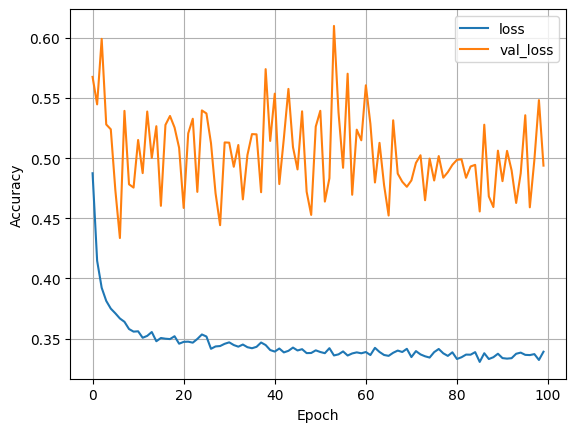

119/119 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8628
16 nodes,dropout 0.2,lr0.005,batch size 32


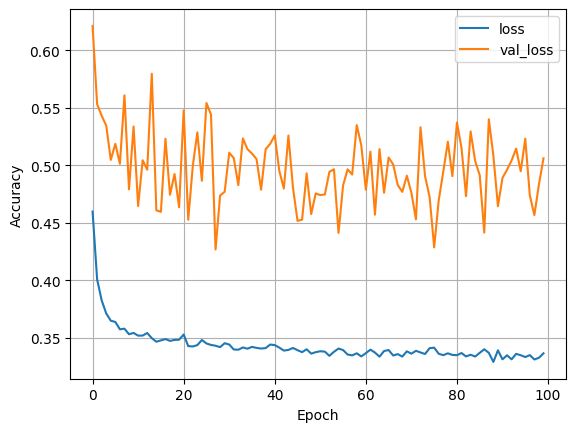

119/119 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8638
16 nodes,dropout 0.2,lr0.005,batch size 64


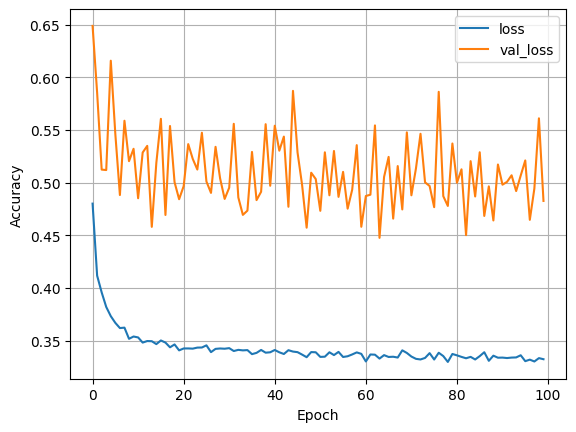

119/119 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8672
16 nodes,dropout 0.2,lr0.005,batch size 128


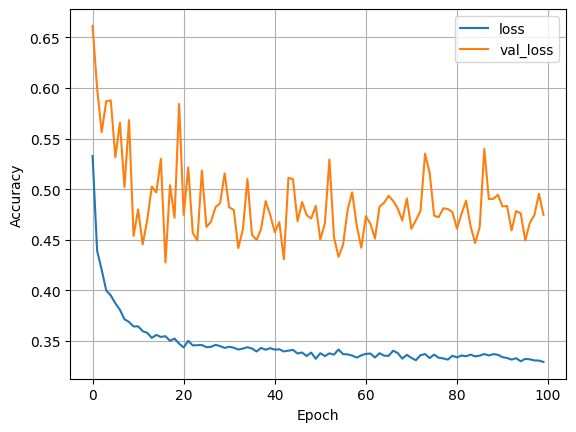

119/119 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8659
16 nodes,dropout 0.2,lr0.001,batch size 32


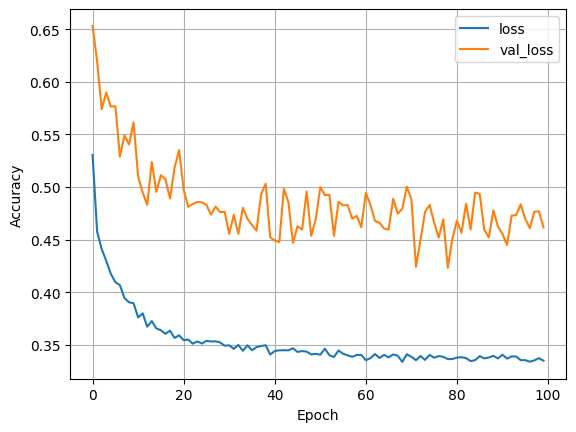

119/119 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8683
16 nodes,dropout 0.2,lr0.001,batch size 64


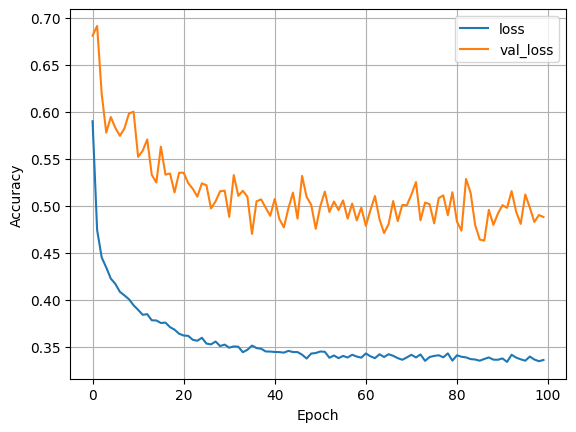

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8670
16 nodes,dropout 0.2,lr0.001,batch size 128


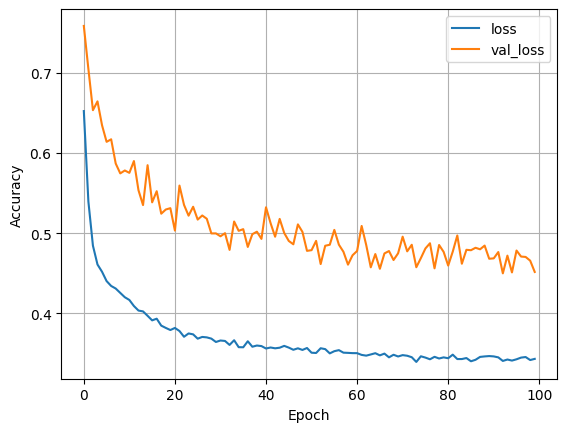

119/119 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8649
32 nodes,dropout 0,lr0.01,batch size 32


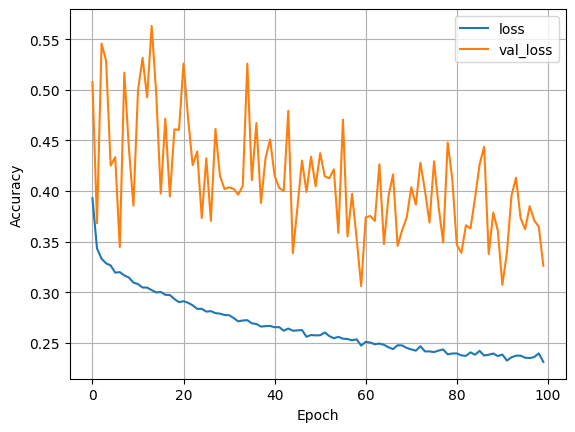

119/119 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8625
32 nodes,dropout 0,lr0.01,batch size 64


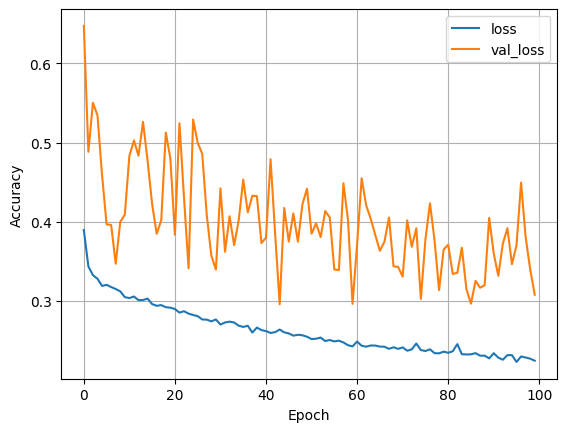

119/119 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8654
32 nodes,dropout 0,lr0.01,batch size 128


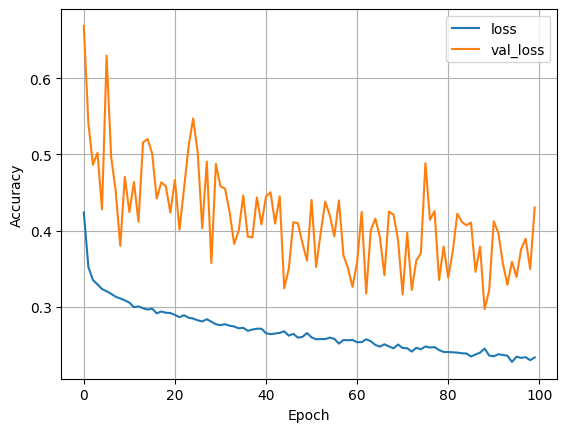

119/119 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8649
32 nodes,dropout 0,lr0.005,batch size 32


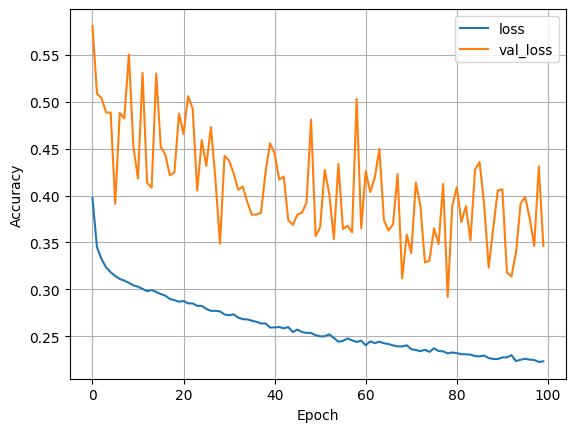

119/119 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8717
32 nodes,dropout 0,lr0.005,batch size 64


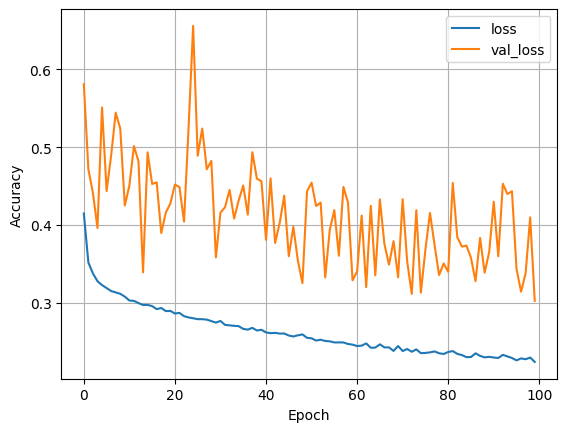

119/119 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8546
32 nodes,dropout 0,lr0.005,batch size 128


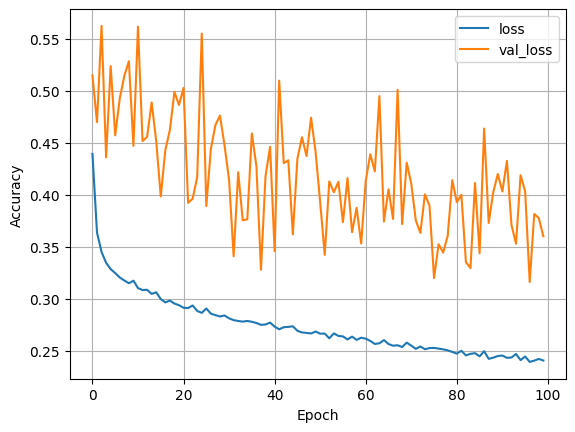

119/119 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8699
32 nodes,dropout 0,lr0.001,batch size 32


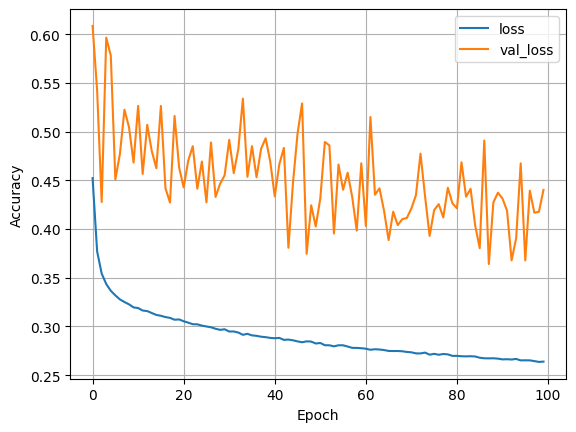

119/119 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8712
32 nodes,dropout 0,lr0.001,batch size 64


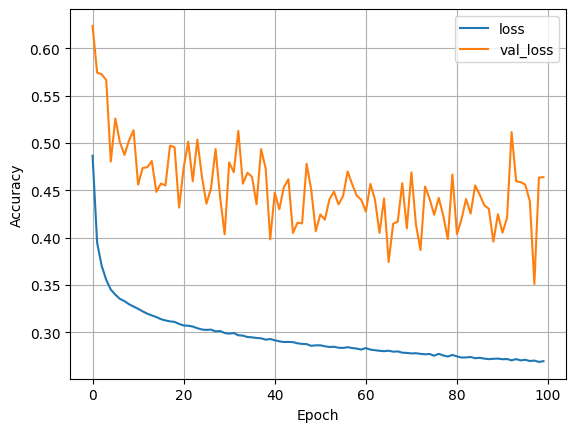

119/119 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8707
32 nodes,dropout 0,lr0.001,batch size 128


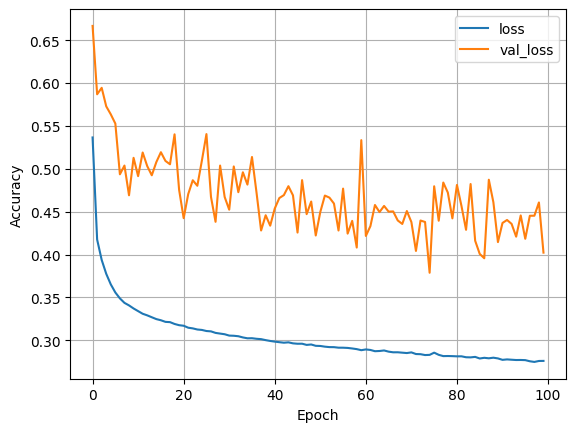

119/119 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8693
32 nodes,dropout 0.2,lr0.01,batch size 32


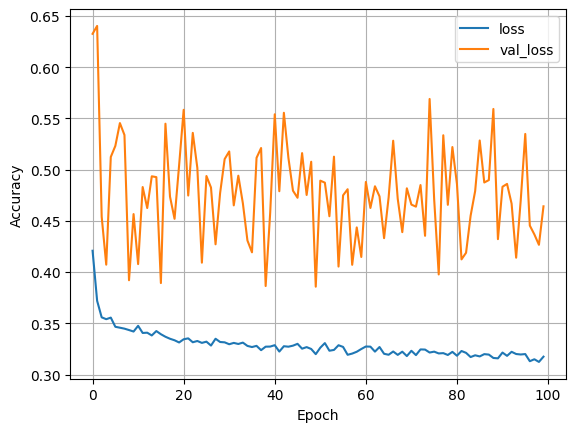

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8662
32 nodes,dropout 0.2,lr0.01,batch size 64


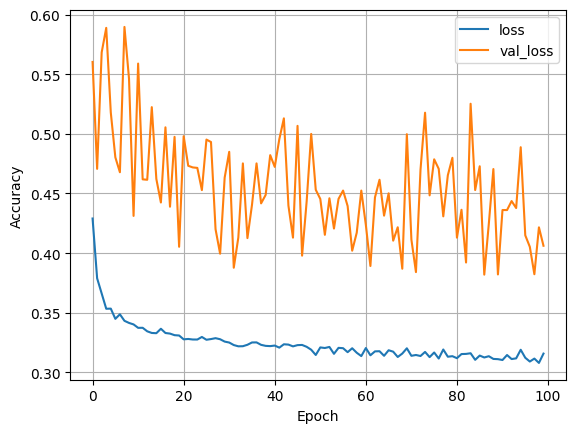

119/119 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8715
32 nodes,dropout 0.2,lr0.01,batch size 128


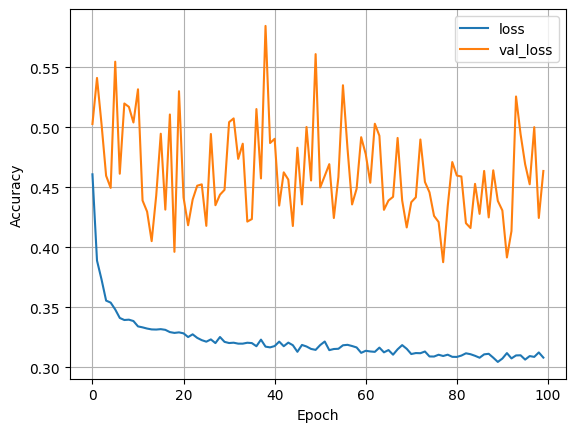

119/119 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8707
32 nodes,dropout 0.2,lr0.005,batch size 32


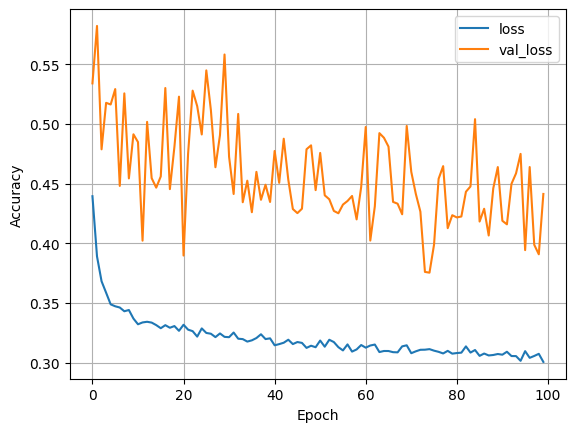

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8736
32 nodes,dropout 0.2,lr0.005,batch size 64


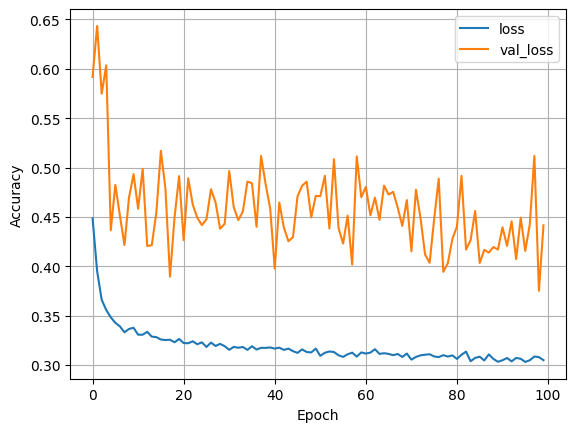

119/119 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8730
32 nodes,dropout 0.2,lr0.005,batch size 128


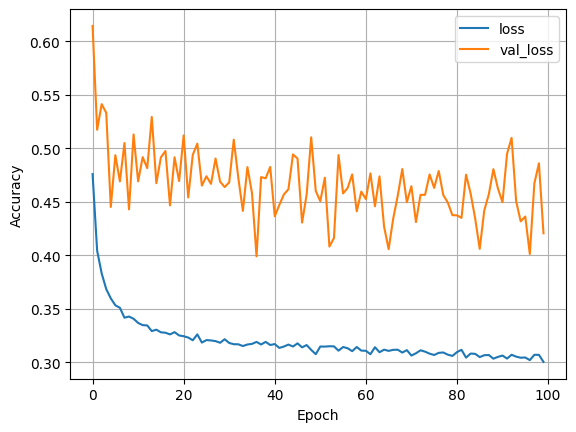

119/119 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8715
32 nodes,dropout 0.2,lr0.001,batch size 32


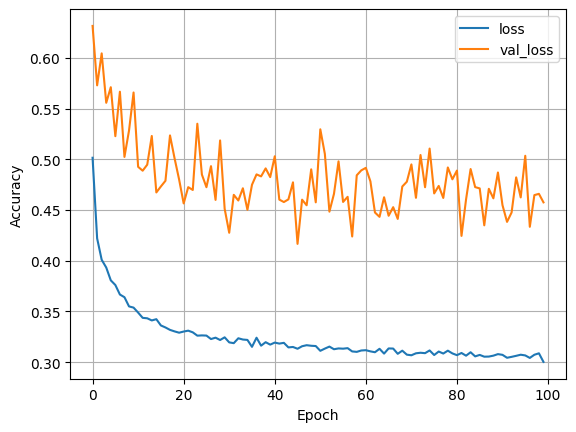

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8675
32 nodes,dropout 0.2,lr0.001,batch size 64


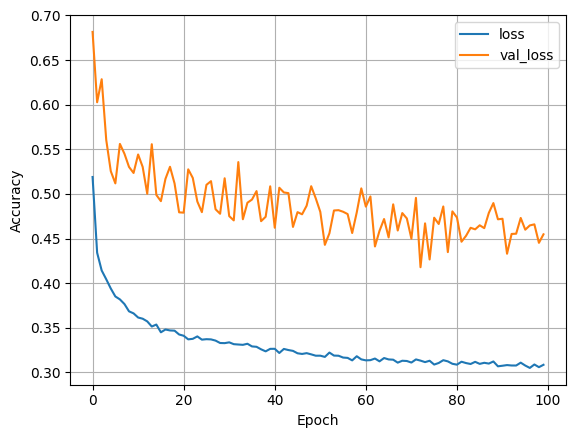

119/119 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8743
32 nodes,dropout 0.2,lr0.001,batch size 128


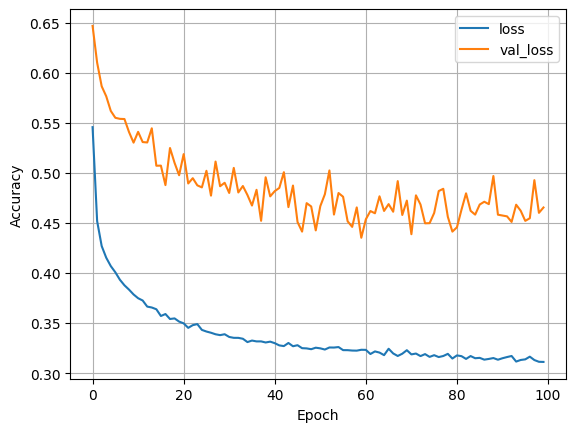

119/119 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8730
64 nodes,dropout 0,lr0.01,batch size 32


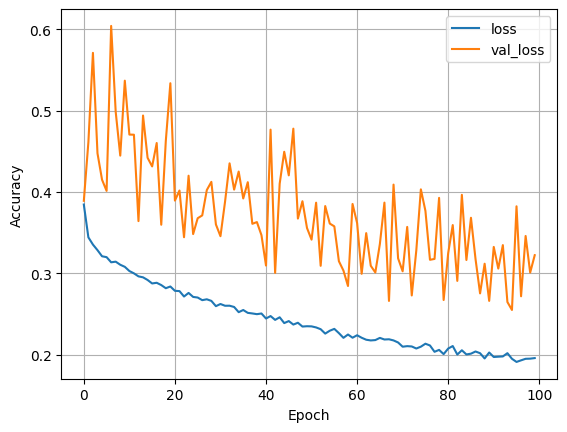

119/119 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.8651
64 nodes,dropout 0,lr0.01,batch size 64


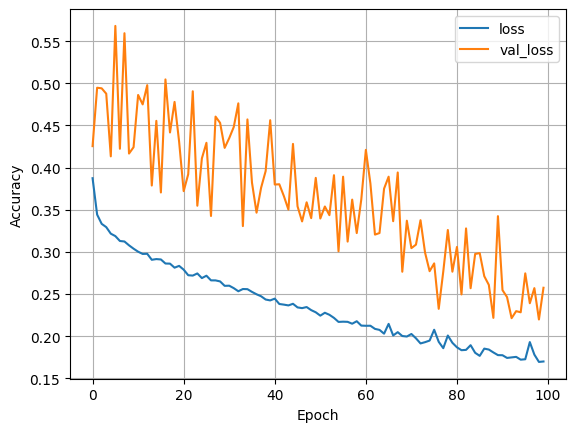

119/119 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.8523
64 nodes,dropout 0,lr0.01,batch size 128


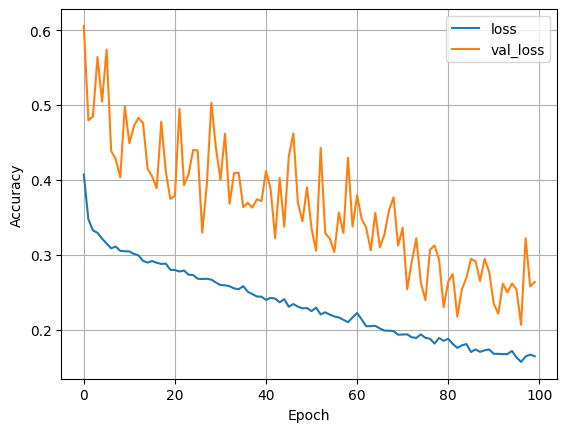

119/119 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.8502
64 nodes,dropout 0,lr0.005,batch size 32


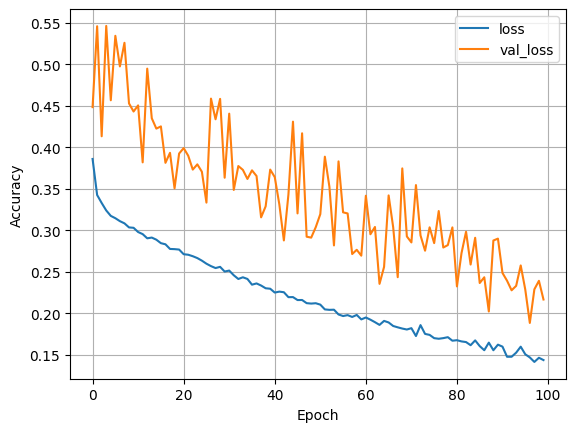

119/119 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.8567
64 nodes,dropout 0,lr0.005,batch size 64


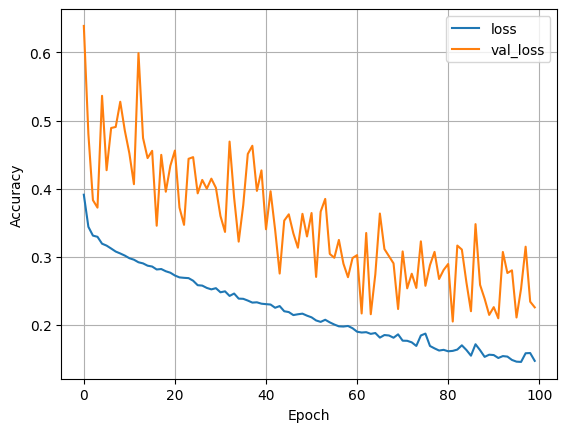

119/119 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.8496
64 nodes,dropout 0,lr0.005,batch size 128


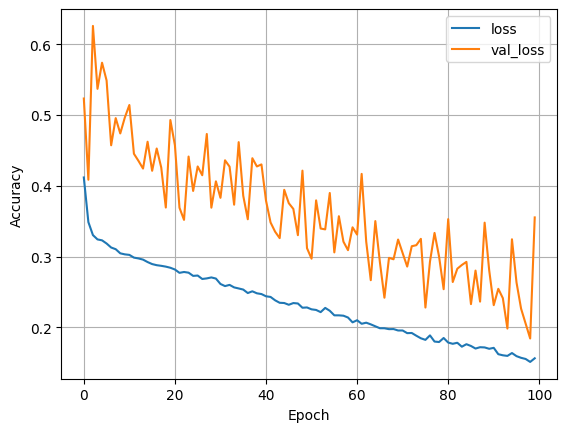

119/119 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.8565
64 nodes,dropout 0,lr0.001,batch size 32


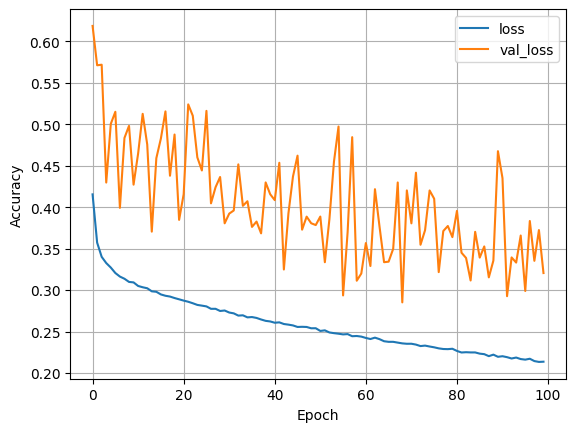

119/119 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8620
64 nodes,dropout 0,lr0.001,batch size 64


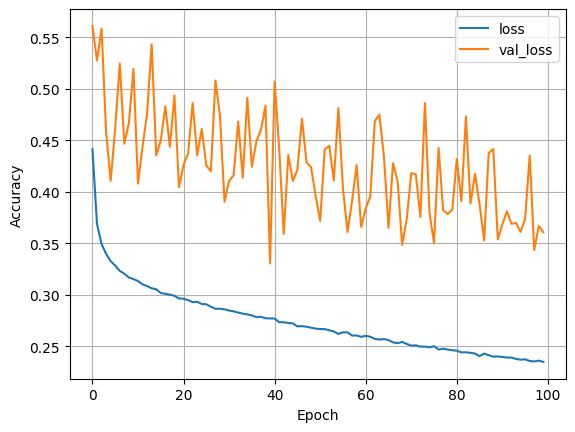

119/119 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8707
64 nodes,dropout 0,lr0.001,batch size 128


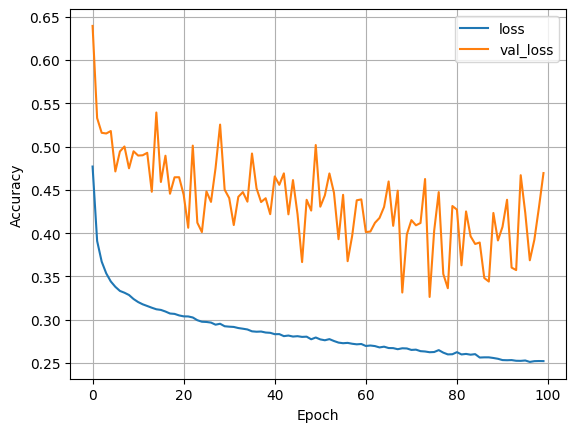

119/119 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8767
64 nodes,dropout 0.2,lr0.01,batch size 32


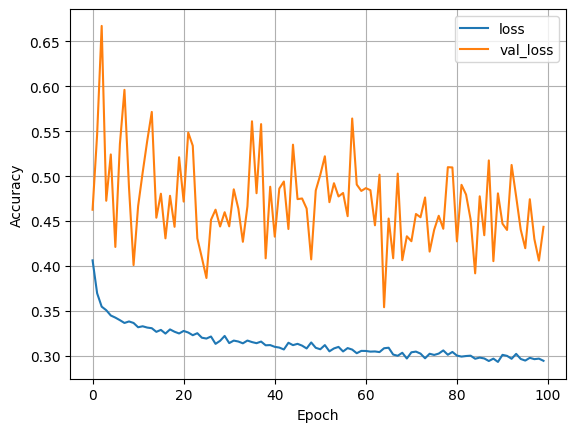

119/119 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8675
64 nodes,dropout 0.2,lr0.01,batch size 64


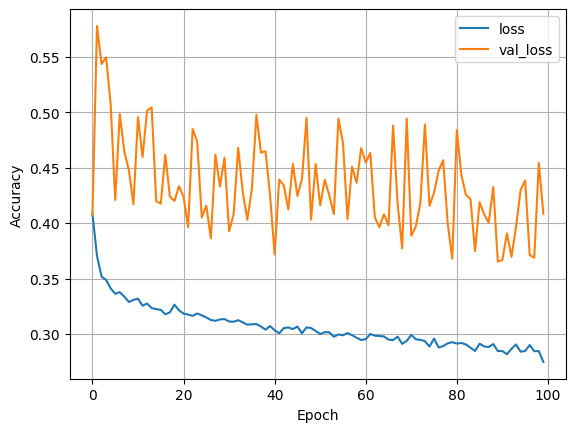

119/119 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8738
64 nodes,dropout 0.2,lr0.01,batch size 128


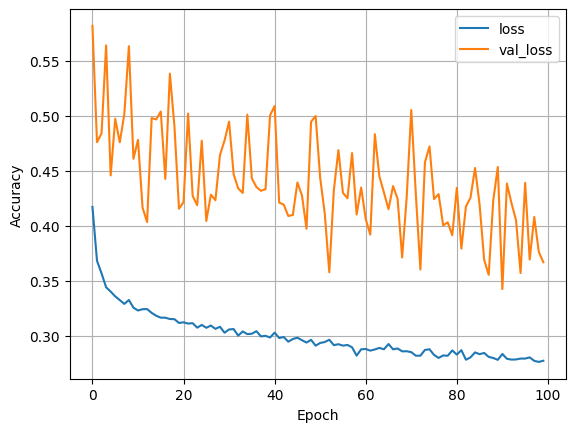

119/119 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8749
64 nodes,dropout 0.2,lr0.005,batch size 32


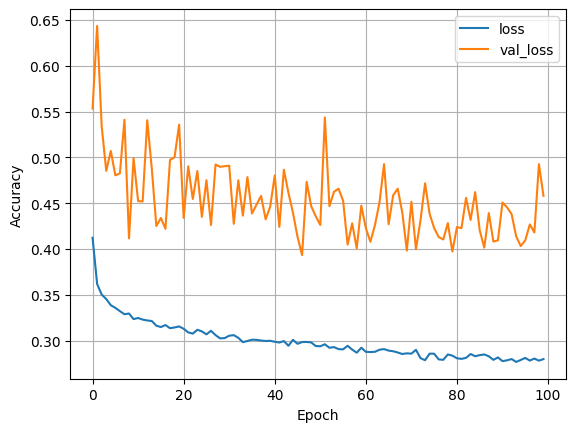

119/119 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8754
64 nodes,dropout 0.2,lr0.005,batch size 64


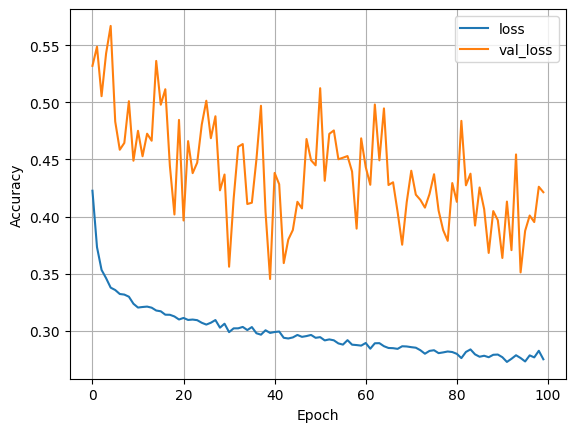

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8759
64 nodes,dropout 0.2,lr0.005,batch size 128


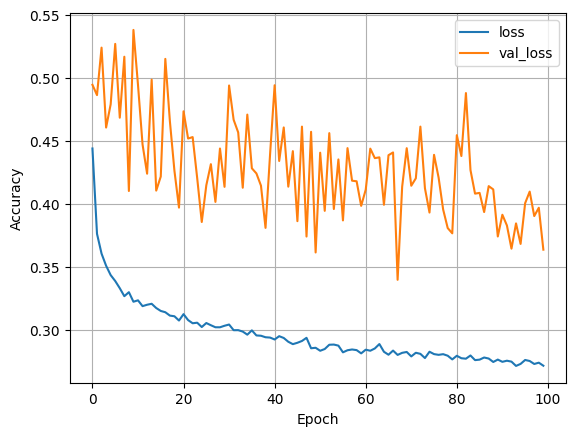

119/119 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8762
64 nodes,dropout 0.2,lr0.001,batch size 32


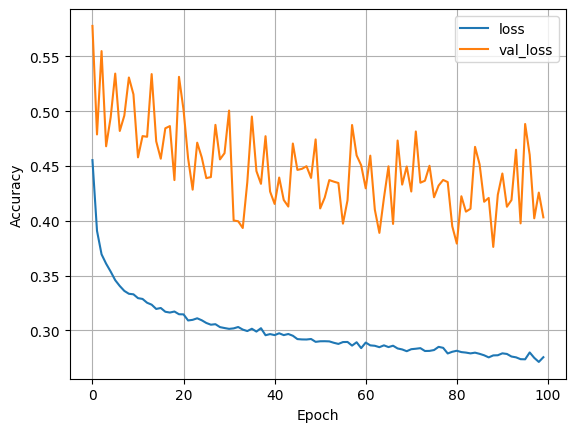

119/119 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8770
64 nodes,dropout 0.2,lr0.001,batch size 64


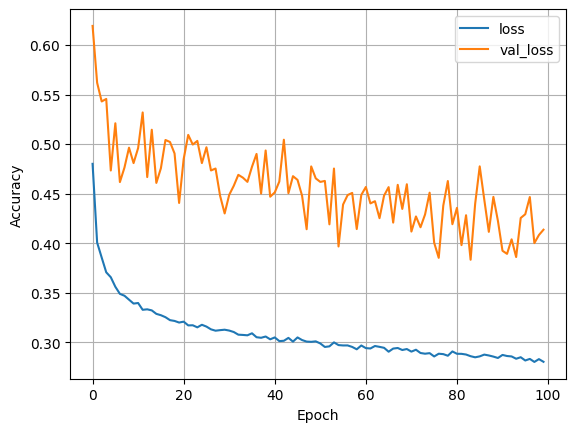

119/119 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8772
64 nodes,dropout 0.2,lr0.001,batch size 128


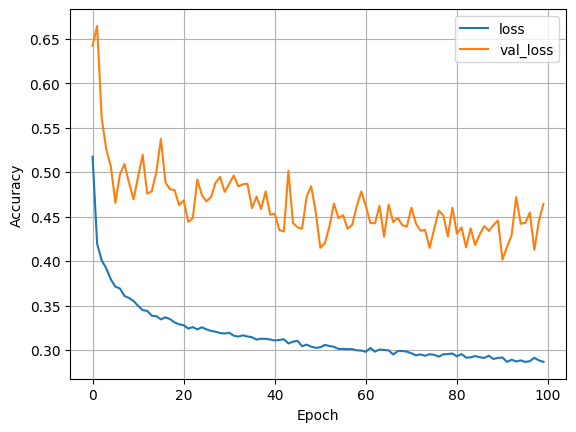

119/119 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8749


In [ ]:
least_val_loss= float('inf')
least_loss_model= None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes,dropout {dropout_prob},lr{lr},batch size {batch_size}")
        model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1322
           1       0.88      0.93      0.91      2482

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

